In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import tree
from sklearn import ensemble

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [29]:
df=pd.read_csv('F:\Programming\Machine Learning\ClassWorks\project\interview(Cleaned).csv')

In [30]:
df.head()

,Client_name,Industry,Closed_pos,Interview_type,Gender,Curr_loc,Curr_job_loc,Interview_venue,Permission_status,Unscd_meet_status,Followup_status,AltNum_status,Resume_status,Venue_status,Call_letter_status,Ex_attend,Obs_attend,Matital_status,Skill
0,Hospira,Pharmaceuticals,Non-Routine,scheduled_walkin,Male,Chennai,hosur,hosur,yes,yes,yes,yes,yes,yes,yes,yes,no,Single,Routine
1,Hospira,Pharmaceuticals,Non-Routine,scheduled_walkin,Male,Chennai,bangalore,hosur,yes,yes,yes,yes,yes,yes,yes,yes,no,Single,Routine
2,Hospira,Pharmaceuticals,Non-Routine,scheduled_walkin,Male,Chennai,chennai,hosur,no,no,no,no,no,no,no,uncertain,no,Single,Routine
3,Hospira,Pharmaceuticals,Non-Routine,scheduled_walkin,Male,Chennai,chennai,hosur,yes,yes,no,yes,no,yes,yes,uncertain,no,Single,Routine
4,Hospira,Pharmaceuticals,Non-Routine,scheduled_walkin,Male,Chennai,bangalore,hosur,yes,yes,yes,yes,yes,yes,yes,uncertain,no,Married,Routine


# Understanding the dataset

### Printout of Resume

<AxesSubplot:xlabel='Resume_status', ylabel='count'>

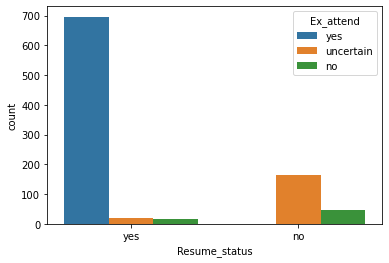

In [48]:
sns.countplot(x=df.Resume_status, hue=df.Ex_attend)

#### Comparitively, people who chose not to attend the interview didn't take the printout

### Necessary Permissions

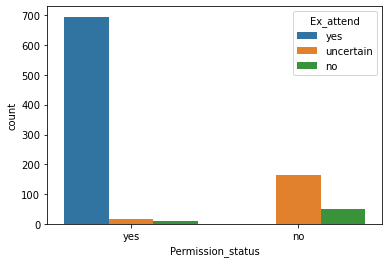

<AxesSubplot:xlabel='Permission_status', ylabel='count'>

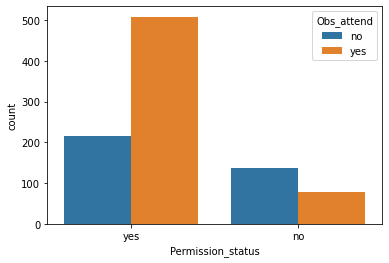

In [53]:
sns.countplot(x=df.Permission_status, hue=df.Ex_attend)
plt.show()
sns.countplot(x=df.Permission_status, hue=df.Obs_attend)

####  People who were certain of not attending the interview didn't take the necessary permissions.

### Current location

<AxesSubplot:xlabel='Curr_loc', ylabel='count'>

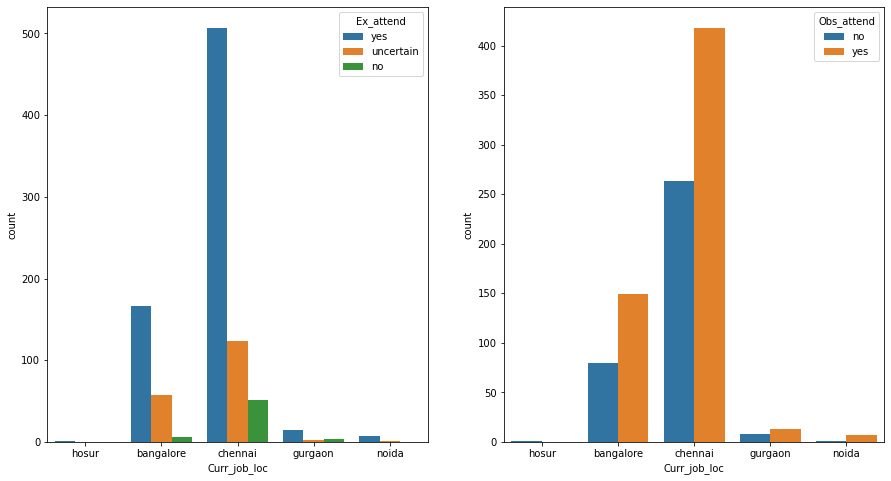

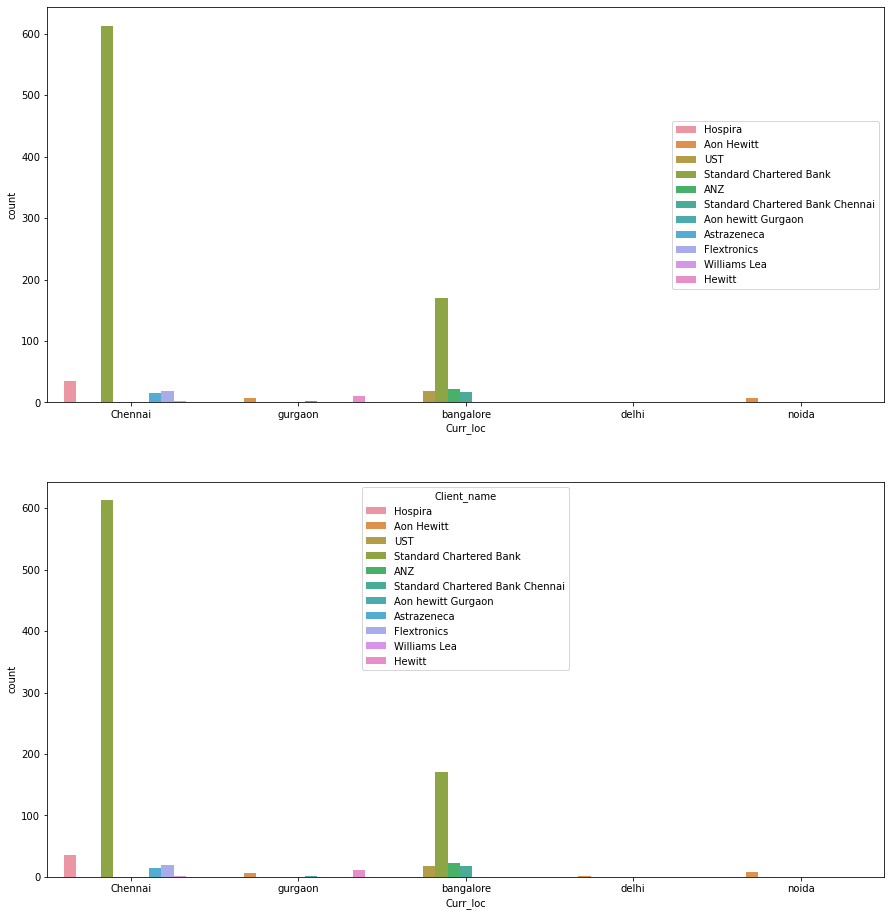

In [54]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
sns.countplot(x=df.Curr_job_loc, hue=df.Ex_attend, ax=ax1)
sns.countplot(x=df.Curr_job_loc, hue=df.Obs_attend, ax=ax2)
f, (ax1, ax2) = plt.subplots(2, figsize=(15,16))
sns.countplot(x=df.Curr_loc, hue=df.Client_name, ax=ax1)
ax1.legend(loc='right')
sns.countplot(x=df.Curr_loc, hue=df.Client_name, ax=ax2)

    #Traditional trends were seen when it came to Expected and Observed attendance.
        Lesser people attended the interview than the expected count.
    #In this dataset, more jobs were offered at Bangalore and Chennai.
    #Standard Chartered offered the highest number of jobs at these locations as it had operations at both Chennai and  Bangalore.

### Current Location and Job location

<AxesSubplot:xlabel='Curr_job_loc', ylabel='count'>

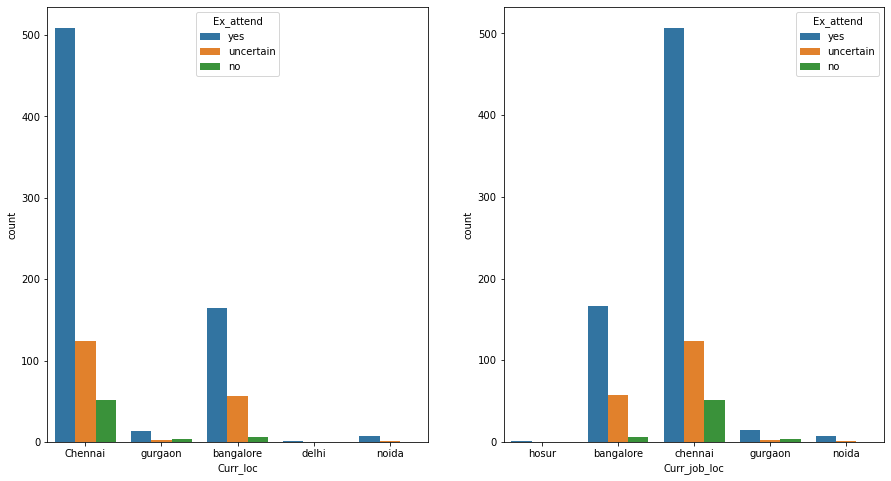

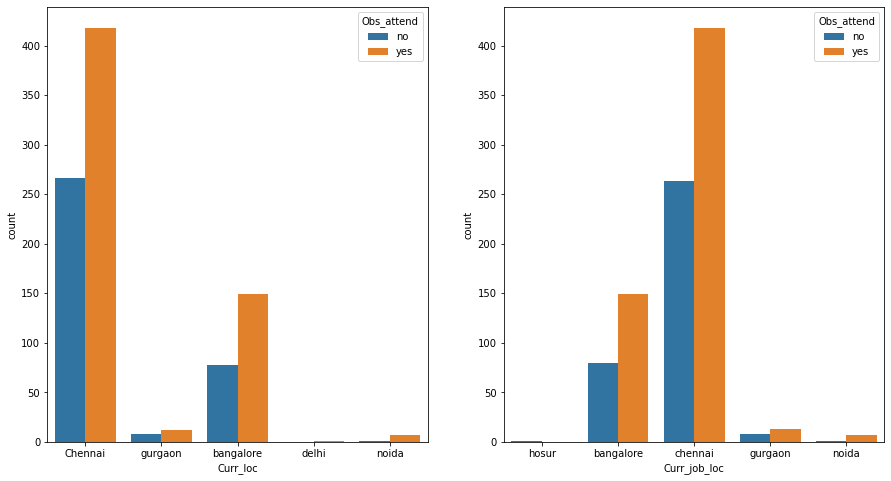

In [55]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
sns.countplot(x=df.Curr_loc, hue=df.Ex_attend, ax=ax1)
sns.countplot(x=df.Curr_job_loc, hue=df.Ex_attend, ax=ax2)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
sns.countplot(x=df.Curr_loc, hue=df.Obs_attend, ax=ax1)
sns.countplot(x=df.Curr_job_loc, hue=df.Obs_attend, ax=ax2)

In [57]:
df.groupby(['Curr_loc', 'Curr_job_loc', 'Ex_attend', 'Obs_attend']).size()

Curr_loc   Curr_job_loc  Ex_attend  Obs_attend
Chennai    bangalore     uncertain  no              1
                         yes        no              1
           chennai       no         no             50
                                    yes             1
                         uncertain  no             64
                                    yes            59
                         yes        no            149
                                    yes           358
           hosur         yes        no              1
bangalore  bangalore     no         no              6
                         uncertain  no             30
                                    yes            26
                         yes        no             42
                                    yes           123
delhi      gurgaon       yes        yes             1
gurgaon    gurgaon       no         no              4
                         uncertain  no              1
                                   

    Looking at the above graphs and the groupby data:

    #People who were unsure of attending the interview had a pretty even distribution in the Observed Attendance attribute.
    #People were offered higher percentage of jobs at locations that were same as their current location or were close to their current location.

### Gender with Industry and Job position offered

<AxesSubplot:xlabel='Gender', ylabel='count'>

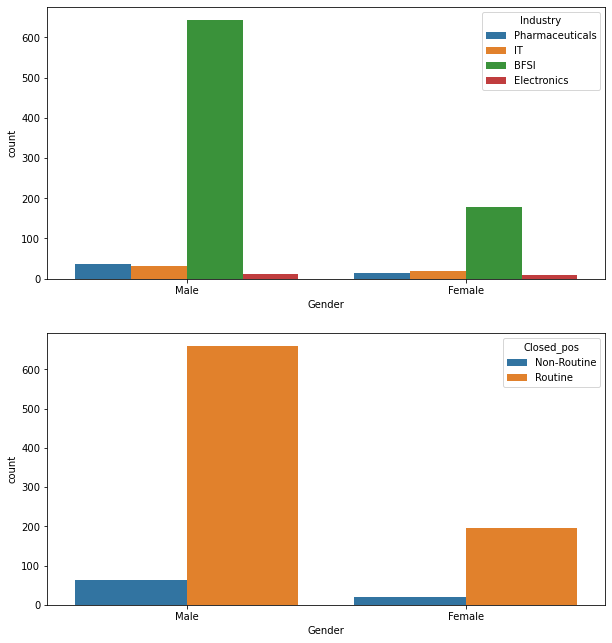

In [62]:
f, (ax1, ax2) = plt.subplots(2, figsize=(10,11))
sns.countplot(x=df.Gender, hue=df.Industry, ax=ax1)
sns.countplot(x=df.Gender, hue=df.Closed_pos, ax=ax2)

In [64]:
df.groupby(['Gender', 'Industry', 'Closed_pos']).size()

Gender  Industry         Closed_pos 
Female  BFSI             Non-Routine     11
                         Routine        167
        Electronics      Routine          8
        IT               Non-Routine      6
                         Routine         12
        Pharmaceuticals  Non-Routine      4
                         Routine          9
Male    BFSI             Non-Routine     30
                         Routine        614
        Electronics      Routine         11
        IT               Non-Routine     17
                         Routine         14
        Pharmaceuticals  Non-Routine     16
                         Routine         21
dtype: int64

    #The dataset contains a higher number of male candidates than female candidates. However, the distibution of jobs offered across industry was pretty similar.

### Gender with Marital status

<AxesSubplot:xlabel='Gender', ylabel='count'>

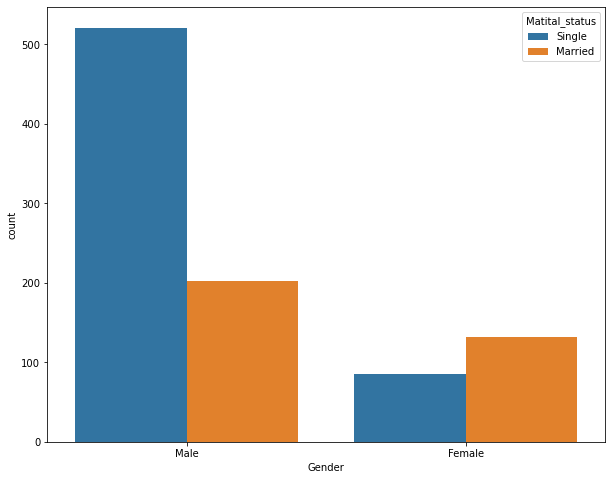

In [65]:
f , ax = plt.subplots(1, figsize=(10,8)) 
sns.countplot(x=df.Gender, hue=df.Matital_status, ax=ax)

In [66]:
df.groupby(['Gender', 'Matital_status', 'Ex_attend', 'Obs_attend']).size()

Gender  Matital_status  Ex_attend  Obs_attend
Female  Married         no         no             13
                                   yes             1
                        uncertain  no             15
                                   yes            12
                        yes        no             24
                                   yes            67
        Single          no         no              8
                        uncertain  no             10
                                   yes             9
                        yes        no             16
                                   yes            42
Male    Married         no         no             14
                        uncertain  no             22
                                   yes            18
                        yes        no             44
                                   yes           104
        Single          no         no             25
                        uncertain  no             49


    1.A higher number of female candiates were married compared to male candidates.
    2.However, when it came to expected attendance and observed attendance, the disribution was pretty similar.